# Chapter 5: Support Vector machines

Support Vector is an interesting beast. It relies on the fact that to separate two areas, most of the decision is made by a small set of values, these are called the support vectors. These are the boundary values. Much like the boundary between India and China is not governed by the location of Bombay, but instead on the specifics of Arunachal Pradesh and Kashmir.

There are a few ways of training Support Vector classifiers. SGD will do it, and has the advantage of looking at a subset of the values at a time.  LinearSVC seems to use all of the data at the same time, rather than the SGD mini-batch approach. Finally SVC will do this, and can apply a polynomial or string kernel to generalize the model to polynomial or strings, or other specialized attributes.

In [15]:
import numpy as np

from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC


In [16]:
iris = datasets.load_iris()
X = iris["data"][:, (2,3)] # petal length, petal width
y = (iris["target"] == 2).astype(np.float64) # Iris Virginica

svm_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('linear_svc', LinearSVC(C=1, loss="hinge")),
])

svm_clf.fit(X, y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linear_svc',
                 LinearSVC(C=1, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=1000, multi_class='ovr',
                           penalty='l2', random_state=None, tol=0.0001,
                           verbose=0))],
         verbose=False)

In [17]:
svm_clf.predict([[5.5, 1.7]])

array([1.])

# The moons dataset, and the "kernel" trick

In [18]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

# Create a random dataset with "moons" that you have to separate
X, y = make_moons(n_samples=1000, noise=0.15)

polynomial_svm_clf = Pipeline([
    ("poly_features", PolynomialFeatures(degree=3)),
    ('scaler', StandardScaler()),
    ('svm_clf', LinearSVC(C=10, loss="hinge", max_iter=10000))
])

polynomial_svm_clf.fit(X, y)

/usr/lib/python3/dist-packages/sklearn/svm/_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Pipeline(memory=None,
         steps=[('poly_features',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 LinearSVC(C=10, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=10000, multi_class='ovr',
                           penalty='l2', random_state=None, tol=0.0001,
                           verbose=0))],
         verbose=False)

In [19]:
print(X[:10])
print(y[:10])


[[ 0.05323325  0.13321014]
 [-0.86227263  0.440631  ]
 [ 2.00450374 -0.07339288]
 [ 1.42632308 -0.45938251]
 [-0.61840859  0.70224699]
 [-0.73580928  0.47889129]
 [ 0.64404603 -0.40632139]
 [ 1.34789629 -0.40495232]
 [ 0.93312339 -0.4256853 ]
 [-0.95237849  0.20548988]]
[1 0 1 1 0 0 1 1 1 0]


In [20]:
index=(y==1)
print(index[0:10])
print (X[index][:10, 0:1])

[ True False  True  True False False  True  True  True False]
[[0.05323325]
 [2.00450374]
 [1.42632308]
 [0.64404603]
 [1.34789629]
 [0.93312339]
 [1.85807135]
 [0.24415253]
 [0.2952573 ]
 [0.37521493]]


In [21]:
X[:, 0]

array([ 5.32332466e-02, -8.62272628e-01,  2.00450374e+00,  1.42632308e+00,
       -6.18408586e-01, -7.35809283e-01,  6.44046028e-01,  1.34789629e+00,
        9.33123394e-01, -9.52378488e-01,  1.85807135e+00,  2.44152535e-01,
        2.95257301e-01, -3.12299427e-01, -9.52707961e-01,  3.75214926e-01,
       -6.54552111e-01,  9.15439431e-02, -1.19222430e-01,  8.10608084e-01,
        9.41654762e-01, -9.52525912e-01,  7.33378572e-01,  2.84936922e-01,
        9.81831347e-01,  9.85343076e-01,  7.75645014e-01,  1.42637941e+00,
        9.13645662e-01, -5.85948233e-01,  3.42148629e-01, -6.36821306e-01,
        6.20272241e-01,  8.52509752e-01,  8.64360414e-02, -2.40536380e-01,
        1.66178584e+00, -5.76194599e-02,  1.09396155e+00,  1.62733810e+00,
       -1.24272068e+00,  7.20988265e-01,  5.35979518e-01,  3.90414991e-01,
        9.49684396e-01, -4.22203894e-01,  3.33561452e-01,  1.31836324e+00,
        1.04772892e+00,  4.90675174e-01,  5.40909584e-01,  7.48941897e-02,
        1.63141239e-01,  

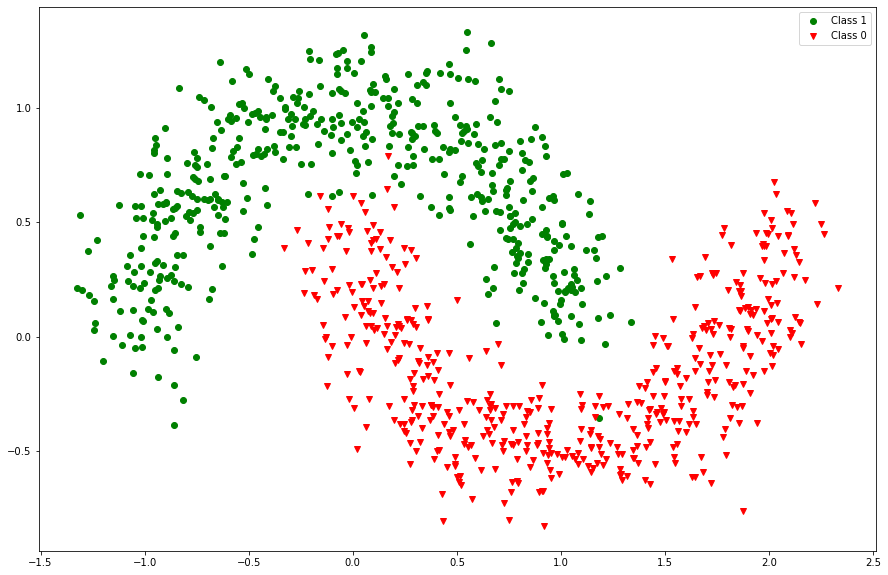

In [22]:
# Plot this data
import matplotlib.pyplot as plt

index_c0 = (y == 0)
index_c1 = (y == 1)

plt.figure(figsize=(15, 10))

plt.plot(X[index_c0][:,0], X[index_c0][:,1], 'go', label='Class 1')
plt.plot(X[index_c1][:,0], X[index_c1][:,1], 'rv', label='Class 0')
plt.legend()



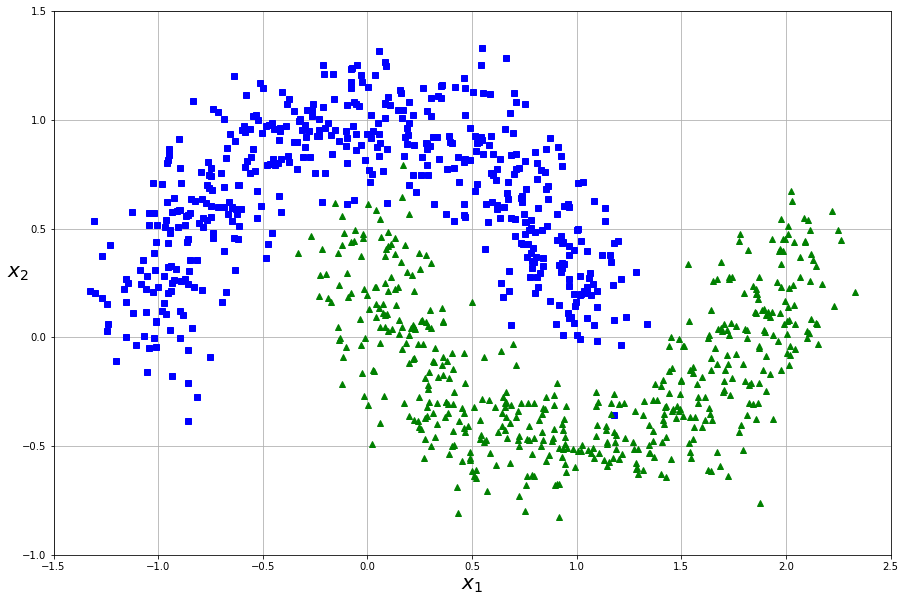

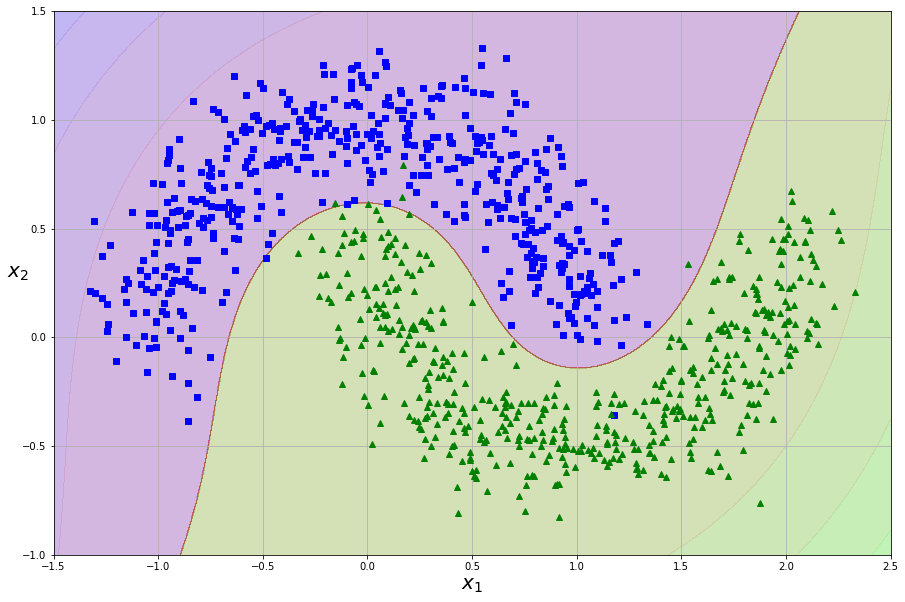

In [25]:
# Using the notebook from homl.info

def plot_dataset(X, y, axes):
    "Plot the Moons dataset with two classes: 0 and 1"
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)


def plot_predictions(clf, axes):
    "Visualize what the classifier will choose on this dataset"
    x0s = np.linspace(axes[0], axes[1], 1000)
    x1s = np.linspace(axes[2], axes[3], 1000)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

# Plot the data
plt.figure(figsize=(15, 10))
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

# Plot the predictions and the classifier
plt.figure(figsize=(15, 10))
plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()


In [28]:
# Try a different classifier

p1 = Pipeline([
    ("poly_features", PolynomialFeatures(degree=3)),
    ('scaler', StandardScaler()),
    ('svm_clf', LinearSVC(C=1, loss="hinge", max_iter=10000))
])

p1.fit(X, y)

Pipeline(memory=None,
         steps=[('poly_features',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 LinearSVC(C=1, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=10000, multi_class='ovr',
                           penalty='l2', random_state=None, tol=0.0001,
                           verbose=0))],
         verbose=False)

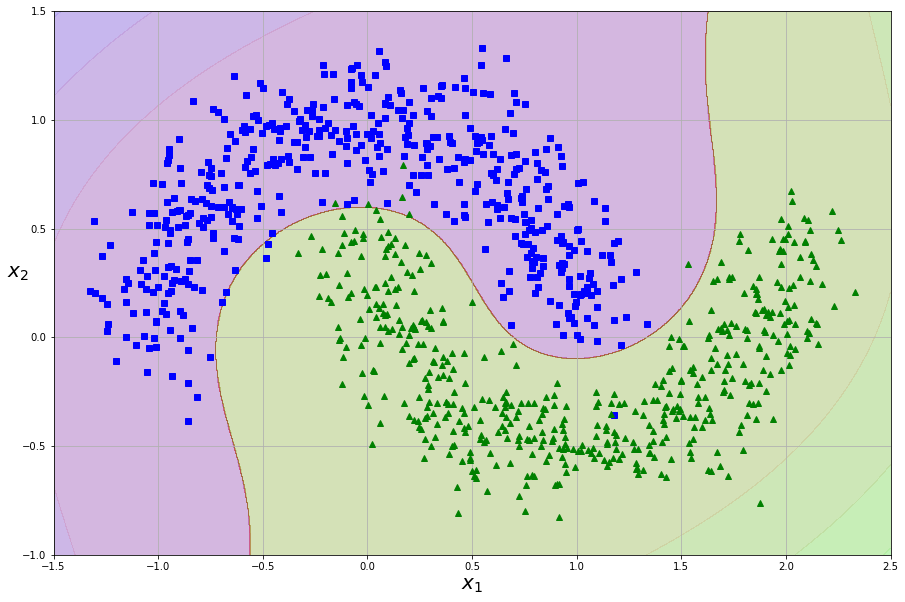

In [29]:
# Plot the predictions and the classifier
plt.figure(figsize=(15, 10))
plot_predictions(p1, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()


Area Under Curve for  C=1, SVM polynomial  is  0.991


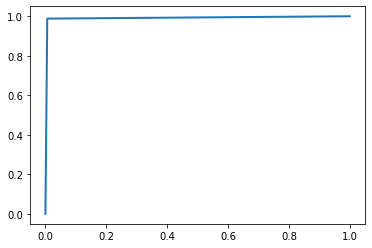

In [34]:
# Which one has lesser ROC scores?
from sklearn.metrics import roc_curve, roc_auc_score

def roc(clf, X, y, label):
    "Plot ROC curve for this classifier"
    
    y_pred = clf.predict(X)
    fpr, tpr, thresholds = roc_curve(y, y_pred)
    print("Area Under Curve for ", label, " is ", roc_auc_score(y, y_pred))
    
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.show()
    
roc(p1, X, y, "C=1, SVM polynomial")

Area Under Curve for  C=10, SVM polynomial  is  0.994


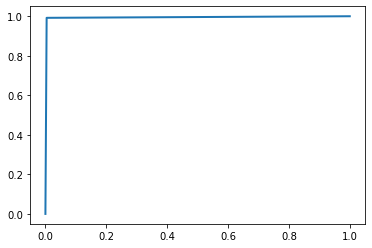

In [35]:
roc(polynomial_svm_clf, X, y, "C=10, SVM polynomial")

In [32]:
SVC?

Object `SVC` not found.


In [33]:
from sklearn.svm import SVC
SVC?

In [36]:
# Let's use the kernel trick to create a SVC with Radial Basis Function (RBF) kernel

rbf_svm = Pipeline([
    ('scaler', StandardScaler()),
    ('svm_classifier', SVC(kernel="rbf", gamma=5, C=0.001))
])

rbf_svm.fit(X, y)


Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_classifier',
                 SVC(C=0.001, break_ties=False, cache_size=200,
                     class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3, gamma=5,
                     kernel='rbf', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

Area Under Curve for  C=0.001, SVM with RBF kernel  is  0.988


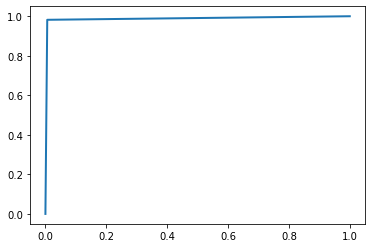

In [37]:

roc(rbf_svm, X, y, "C=0.001, SVM with RBF kernel")

Interesting, it is worse than with polynomial (3rd degree) features. Let's try with a polynomial kernel instead


In [38]:
SVC?

In [43]:
# Polynomial kernel

poly_kernel_svm = Pipeline([
    ('scaler', StandardScaler()),
    ('svm_classifier', SVC(kernel="poly", degree=3, gamma=50, C=1))
])

poly_kernel_svm.fit(X, y)


Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_classifier',
                 SVC(C=1, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma=50, kernel='poly', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

Area Under Curve for  C=0.001, SVM with Polynomial (3rd degree) kernel  is  0.8810000000000001


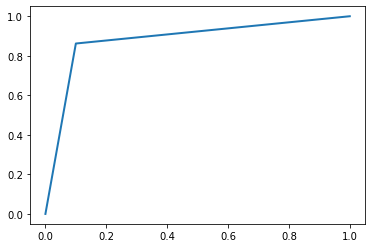

In [44]:

roc(poly_kernel_svm, X, y, "C=0.001, SVM with Polynomial (3rd degree) kernel")